In [2]:
from manim import *
from numpy import linalg as npl
import math
import matplotlib.pyplot as plt
import jupyter_capture_output

video_scene = " -v WARNING --progress_bar None --disable_caching euler_Scene"
image_scene = f" -v WARNING --progress_bar None --disable_caching -r {2*427},{2*240}  -s euler_Scene"

Manim Community v0.17.3

Jupyter Capture Output v0.0.8


In [10]:
def get_gauss(phi):
    return 2*np.cos(phi) + 2*np.sin(phi)*1j

def parametric_e_i_ph(phi):
    return 2*np.cos(phi), 2*np.sin(phi)

Output saved by overwring previous file at animations/euler/euler.mp4.


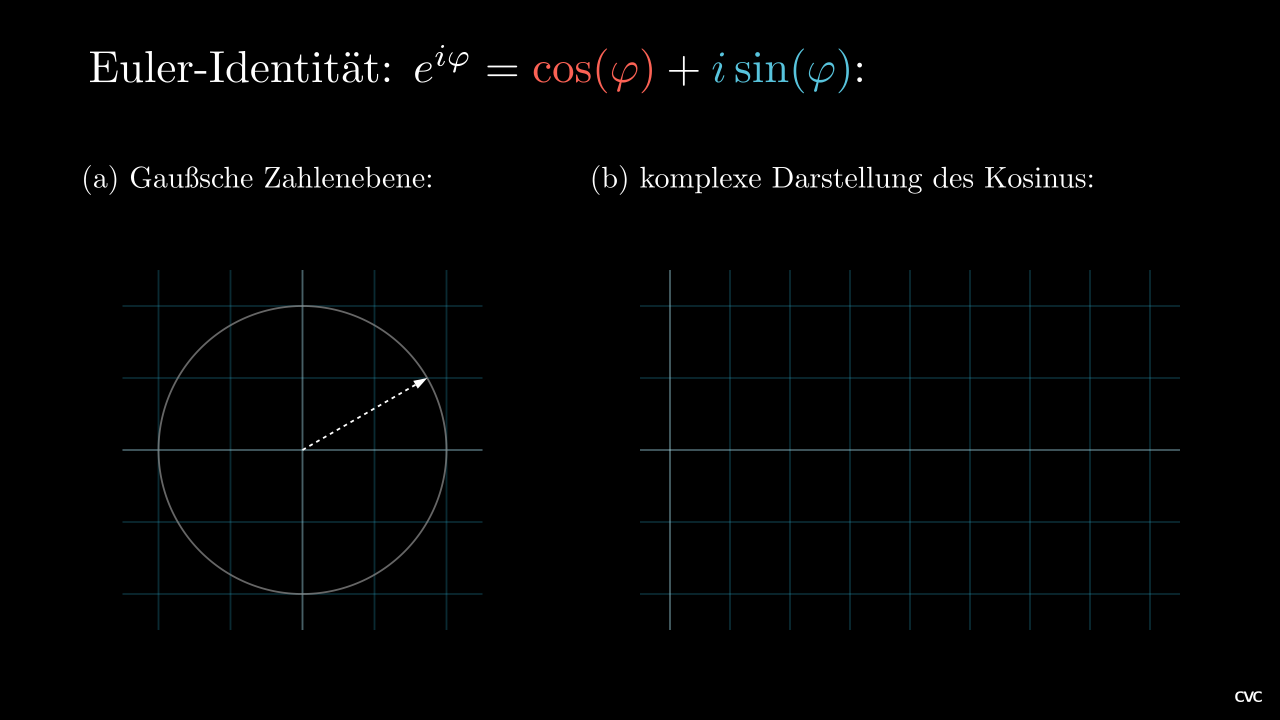

In [44]:
%%capture_video --path "animations/euler/euler.mp4"
%%manim -qm --fps 60 $video_scene

class euler_Scene(Scene):
    def construct(self):
        CVC = Text('CVC', font_size = 12, weight = BOLD, color = WHITE, font = 'Latin Modern Sans').align_on_border(RIGHT + DOWN, buff = 0.2)
        self.add(CVC)
        phi_tracker = ValueTracker(PI/8)


        # Euler-Headline
        text_euler = Tex(r"Euler-Identität: $e^{i\varphi}=\cos(\varphi)+i\sin(\varphi)$:", font_size = 48).align_on_border(UP + LEFT, buff = 0.5).shift(0.5 * RIGHT)
        text_euler[0][21:27].set_color(RED)
        text_euler[0][28:35].set_color(BLUE)

        text_a = Tex(r'(a) Gaußsche Zahlenebene:', font_size = 32).move_to([-4.25, 2, 0])
        text_b = Tex(r'(b) komplexe Darstellung des Kosinus:', font_size = 32).move_to([2.25, 2, 0])


        # Coordinate System a: Gaußebene
        origin_a = [-3.75, -1, 0]

        x_range_a = [-2.5, 2.5, 1]
        y_range_a = [-2.5, 2.5, 1]

        x_length_a = 4
        y_length_a = 4

        npla_a = ComplexPlane(
            x_range = x_range_a, y_range = y_range_a, x_length = x_length_a, y_length = y_length_a, 
            axis_config = {"include_numbers": False, "stroke_opacity": 0.25}, background_line_style = {"stroke_opacity": 0.25}, ).move_to(origin_a)#.add_coordinates()

        e_to_power_iphi = npla_a.plot_parametric_curve(parametric_e_i_ph, color = GREY, stroke_width = 2, t_range = [0, 2*PI], stroke_opacity = 0.75)
        complex_arrow = DashedLine(npla_a.n2p(0), npla_a.n2p(get_gauss(PI/6)), color = WHITE, stroke_width = 2).add_tip(tip_length = 0.15, tip_width = 0.1)#.set_opacity(0.5) 

        # Arrow-Updater
        def arrow_updater(arrow):
            phi = phi_tracker.get_value()
            arrow.become(DashedLine(npla_a.n2p(0), npla_a.n2p(get_gauss(phi)), color = WHITE, stroke_width = 2).add_tip(tip_length = 0.15, tip_width = 0.1))


        # Coordinate System b: Polardarstellung Kosinus
        origin_b = [3, -1, 0]

        x_range_b = [-0.5, 8.5, 1]
        y_range_b = [-2.5, 2.5, 1]

        x_length_b = 6
        y_length_b = 4

        npla_b = ComplexPlane(
            x_range = x_range_b, y_range = y_range_b, x_length = x_length_b, y_length = y_length_b, 
            axis_config = {"include_numbers": False, "stroke_opacity": 0.25}, background_line_style = {"stroke_opacity": 0.25}, ).move_to(origin_b)#.add_coordinates()



        self.add(text_euler, text_a, text_b)
        self.add(npla_a, e_to_power_iphi, complex_arrow)
        self.add(npla_b)

        # Animation
        # self.play(Write(text_euler), run_time = 3)
        # self.wait(0.5)
        # self.play(FadeIn(npla_a), run_time = 3)
        # self.wait(0.5)
        # self.play(Create(e_to_power_iphi), run_time = 2)
        # self.wait(1.5)
        # self.play(FadeIn(complex_arrow), run_time = 3)
        # complex_arrow.add_updater(arrow_updater)

        # self.play(phi_tracker.animate.set_value(PI), rate_func= smooth, run_time = 3.5)
        # self.play(phi_tracker.animate.set_value(2*PI), rate_func= smooth, run_time = 4)
        # self.wait(3)